In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Exercise 1:
df = pd.read_csv('diabetes.csv')
df.describe()
# There seems to be a strong concentration of glucose in the 62 to 80 range, and it tapers off to zero on the left side and to 122 on the right.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


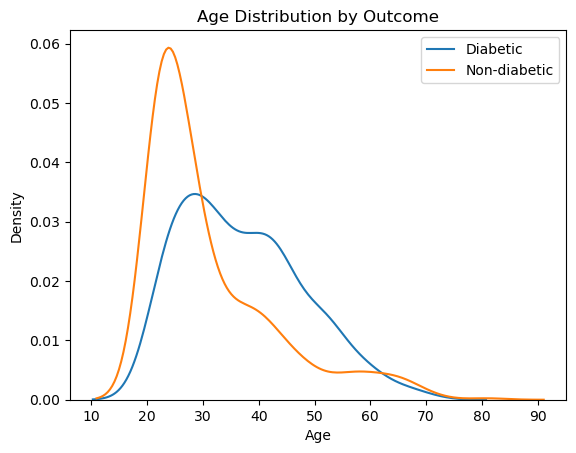

In [4]:
# Exercise 2:
sns.kdeplot(data=df[df['Outcome']==1],x='Age',label='Diabetic')
sns.kdeplot(data=df[df['Outcome']==0],x='Age',label='Non-diabetic')
plt.title('Age Distribution by Outcome')
plt.legend()
plt.show()

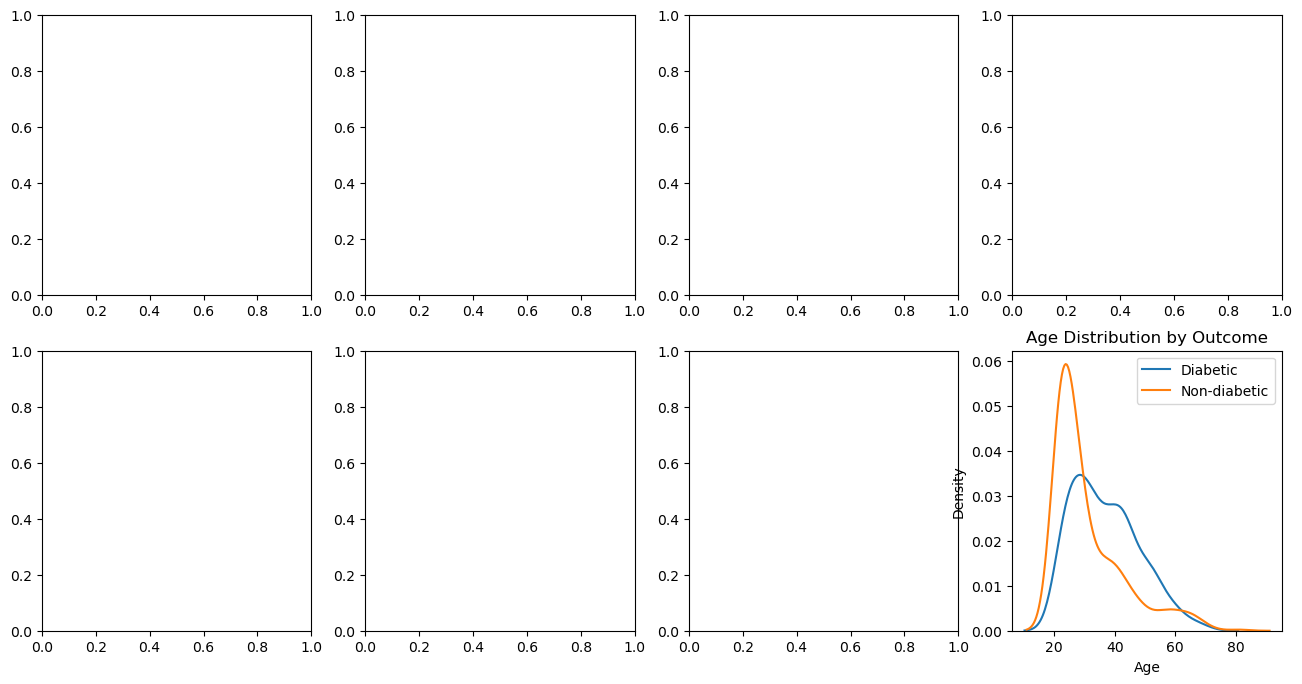

In [5]:
# Exercise 3:
fig, ax = plt.subplots(2,4,figsize=(16,8));
sns.kdeplot(data=df[df['Outcome']==1],x='Age',label='Diabetic',ax=ax[1,3]);
sns.kdeplot(data=df[df['Outcome']==0],x='Age',label='Non-diabetic',ax=ax[1,3]);
ax[1,3].set_title('Age Distribution by Outcome');
ax[1,3].legend();


In [12]:
# Exercise 4 (Lecture 5)

# Running the first cleaning - you already did this! :)
df = pd.read_csv('diabetes.csv')
df_temp = df.drop(columns=['Outcome','Pregnancies','Insulin','SkinThickness'])
df_temp = df_temp.replace(0,np.nan)
df = pd.concat([df['Pregnancies'],df['Insulin'],df['SkinThickness'],df_temp,df['Outcome']],axis=1)
df = df.dropna().reset_index(drop=True)

# The actual solution:

# Step 1
df_temp = pd.concat([df['SkinThickness'],df['Insulin'],df['Pregnancies']],axis=1)
df_temp = df_temp.replace(0, np.nan)

# Step 2
for column in df_temp.columns:
    df_temp[column] = df_temp[column].fillna(df_temp[column].mean())

# Step 3
df.drop(columns=['SkinThickness','Insulin','Pregnancies'],inplace=True)

# Step 4
df = pd.concat([df_temp,df],axis=1)

# Step 5
df.head()

,SkinThickness,Insulin,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,35.000000,156.056122,6.0000,148.0,72.0,33.6,0.627,50,1
1,29.000000,156.056122,1.0000,85.0,66.0,26.6,0.351,31,0
2,29.182331,156.056122,8.0000,183.0,64.0,23.3,0.672,32,1
3,23.000000,94.000000,1.0000,89.0,66.0,28.1,0.167,21,0
4,35.000000,168.000000,4.4784,137.0,40.0,43.1,2.288,33,1
